## Baseline Model

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from utils.utils import apply_one_hot_encoding, full_categorical_columns, align_features
from utils.model import save_model
import seaborn as sns

# Load the cleaned data from the specified path
train_data = pd.read_csv("data/cleaned_Train.csv")

# Separate features (X) and target (y)
# Encode categorical variables in training data
# One-Hot Encoding
X = apply_one_hot_encoding(train_data, target_column='total_cost', categorical_columns=full_categorical_columns)
y = train_data['total_cost']

In [45]:
X.head()

,total_female,total_male,night_mainland,night_zanzibar,total_cost_log,total_cost_capped,country_encoded,total_people,total_nights,country_ANGOLA,...,payment_mode_Other,payment_mode_Travellers Cheque,first_trip_tz_Yes,most_impressing_Excellent Experience,most_impressing_Friendly People,most_impressing_Good service,most_impressing_Missing,most_impressing_No comments,most_impressing_Satisfies and Hope Come Back,"most_impressing_Wonderful Country, Landscape, Nature"
0,1.0,1.0,13.0,0.0,13.421880,674602.5,89,2.0,13.0,False,...,False,False,False,False,True,False,False,False,False,False
1,1.0,0.0,14.0,7.0,14.983309,3214906.5,99,1.0,21.0,False,...,False,False,True,False,False,False,False,False,False,True
2,0.0,1.0,1.0,31.0,15.013968,3315000.0,99,1.0,32.0,False,...,False,False,False,True,False,False,False,False,False,False
3,1.0,1.0,11.0,0.0,15.868384,7790250.0,99,2.0,11.0,False,...,False,False,True,False,True,False,False,False,False,False
4,1.0,0.0,7.0,4.0,14.320822,1657500.0,13,1.0,11.0,False,...,False,False,True,False,False,False,False,True,False,False


In [46]:
# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Validate the model
y_val_pred = model.predict(X_val)

# Evaluate on validation set
mae = mean_absolute_error(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_val_pred)

print("Validation Set Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Validation Set Metrics:
Mean Absolute Error (MAE): 592082.135526378
Mean Squared Error (MSE): 2375573792732.2153
Root Mean Squared Error (RMSE): 1541289.6524444118
R² Score: 0.9831757968722814


### Explanation of Validation Set Metrics

---

#### **1. Average Error (MAE: 592,082 TZS)**  
This means that, on average, the model's predictions for how much a tourist will spend are off by around **592,000 Tanzanian Shillings (TZS)**.  
For example, if the actual cost is 5,000,000 TZS, the model might predict something like 4,400,000 TZS or 5,600,000 TZS. It's a decent prediction, but there’s still room for improvement.

---

#### **2. Big Errors (MSE and RMSE)**  
Sometimes, the model makes bigger mistakes, which we can see from the **RMSE value of 1,541,290 TZS**.  
While the model often predicts costs quite accurately, there are cases where it's off by over **1.5 million TZS**.  
These larger errors might happen with unusual or extreme spending patterns, like tourists who spend way more than average.

---

#### **3. Accuracy (R² Score: 98.3%)**  
The model is doing a great job overall, as it can explain **98.3% of the differences in tourist spending**.  
In other words, the model understands most of the factors that affect spending, such as travel purpose, age group, or trip length. However, there’s still a tiny **1.7% of unexplained variation**, which could be due to other factors we didn't include in the data.

---

### **What This Means**  
- The model is **pretty reliable** at predicting how much tourists will spend in Tanzania, but it’s not perfect.  
- On average, predictions are reasonably close, but **outliers** (tourists who spend unusually high or low amounts) can cause bigger errors.  
- The model is doing an **excellent job** of understanding spending patterns based on the available data.

---

Would you like suggestions on how to reduce these larger errors or try another model?


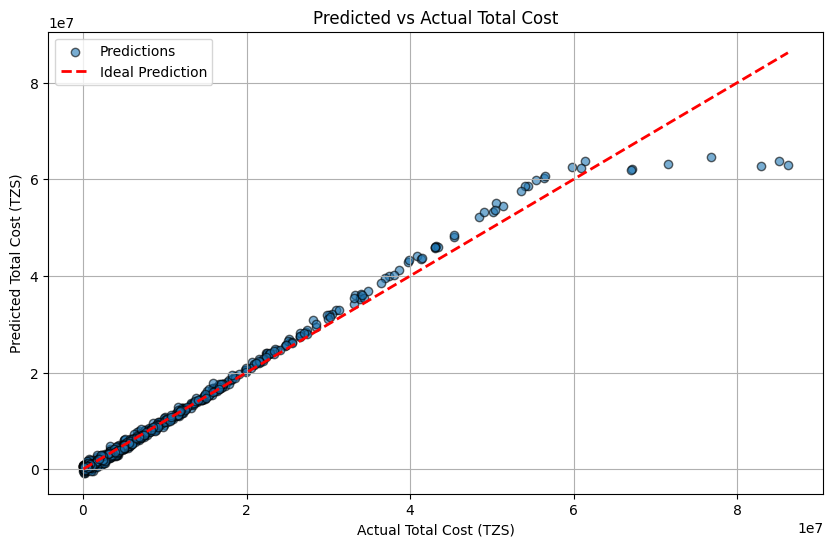

In [47]:
# Plot the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, alpha=0.6, edgecolor='k', label="Predictions")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2, label="Ideal Prediction")
plt.title("Predicted vs Actual Total Cost")
plt.xlabel("Actual Total Cost (TZS)")
plt.ylabel("Predicted Total Cost (TZS)")
plt.legend()
plt.grid()
plt.show()

### Summary:
- The model is accurate for most predictions but slightly underperforms for very high costs.
- This visualization reinforces the need to handle outliers and improve the model's ability to generalize for extreme values.

Let me know if you need suggestions on improving the model further!

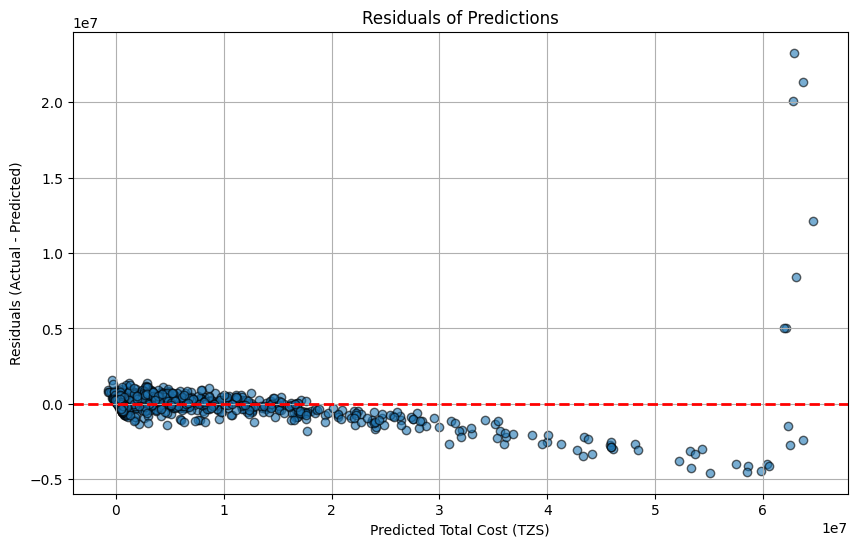

In [48]:
# Residual Plot
residuals = y_val - y_val_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_val_pred, residuals, alpha=0.6, edgecolor='k')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.title("Residuals of Predictions")
plt.xlabel("Predicted Total Cost (TZS)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid()
plt.show()

### Summary:
- The residual plot highlights the need to address:
   - **Outliers** or extreme values that the model underestimates.
   - Potential non-linearity in the data that a linear model cannot capture.

- Steps to improve:
   - Test transformations like **log transformation** of `total_cost`.
   - Experiment with more complex models (e.g., Decision Trees, Random Forest, or Gradient Boosting).

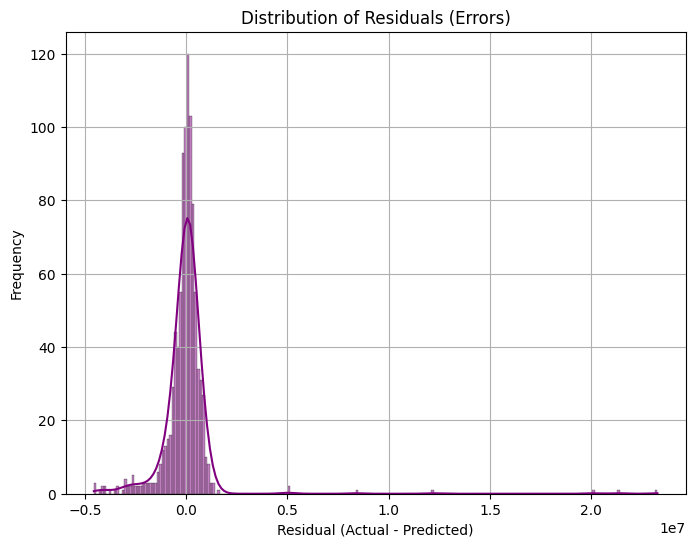

In [49]:
# Plot residuals (errors)
residuals = y_val - y_val_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Distribution of Residuals (Errors)')
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### Conclusion:
- The residual distribution highlights that while the model is effective for typical data points, it struggles with extreme values.
- To address this:
   - Investigate the outliers to determine if they represent **genuine high-cost tourists**.
   - Apply **log transformation** or other feature engineering techniques to handle skewed data.
   - Consider experimenting with **non-linear models** or **ensemble methods** (e.g., Random Forest, Gradient Boosting) for better performance on extreme values.

In [50]:
test_data = pd.read_csv("data/cleaned_Test.csv")
test_data.shape

(1601, 24)

In [51]:
# Predict using the trained model
# One-Hot Encoding
X_test = apply_one_hot_encoding(test_data, target_column='total_cost', categorical_columns=full_categorical_columns)
X_test

,total_female,total_male,night_mainland,night_zanzibar,country_encoded,total_people,total_nights,country_AUSTRALIA,country_AUSTRIA,country_BANGLADESH,...,payment_mode_Other,payment_mode_Travellers Cheque,first_trip_tz_Yes,most_impressing_Excellent Experience,most_impressing_Friendly People,most_impressing_Good service,most_impressing_Missing,most_impressing_No comments,most_impressing_Satisfies and Hope Come Back,"most_impressing_Wonderful Country, Landscape, Nature"
0,1.0,1.0,10,3,1,2.0,13,True,False,False,...,False,False,True,False,False,False,False,False,False,False
1,0.0,4.0,13,0,70,4.0,13,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,3.0,0.0,7,14,26,3.0,21,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,2.0,0.0,0,4,10,2.0,4,False,False,False,...,False,False,True,False,True,False,False,False,False,False
4,2.0,2.0,10,0,81,4.0,10,False,False,False,...,False,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,0.0,1.0,1,0,82,1.0,1,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1597,3.0,1.0,10,5,37,4.0,15,False,False,False,...,True,False,True,False,False,False,False,False,False,False
1598,0.0,1.0,6,0,24,1.0,6,False,False,False,...,False,False,True,False,False,False,False,True,False,False
1599,0.0,1.0,4,0,70,1.0,4,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [52]:
#-----------------------------
# Check Missing Values
#-----------------------------
print("Missing Values per Column:")
display(X_test.isna().sum())

Missing Values per Column:


total_female                                            0
total_male                                              0
night_mainland                                          0
night_zanzibar                                          0
country_encoded                                         0
                                                       ..
most_impressing_Good service                            0
most_impressing_Missing                                 0
most_impressing_No comments                             0
most_impressing_Satisfies and Hope Come Back            0
most_impressing_Wonderful Country, Landscape, Nature    0
Length: 141, dtype: int64

In [53]:
# Align test features to match training features
X_test_aligned = align_features(X_train, X_test)
X_test_aligned

,total_female,total_male,night_mainland,night_zanzibar,total_cost_log,total_cost_capped,country_encoded,total_people,total_nights,country_ANGOLA,...,payment_mode_Other,payment_mode_Travellers Cheque,first_trip_tz_Yes,most_impressing_Excellent Experience,most_impressing_Friendly People,most_impressing_Good service,most_impressing_Missing,most_impressing_No comments,most_impressing_Satisfies and Hope Come Back,"most_impressing_Wonderful Country, Landscape, Nature"
0,1.0,1.0,10,3,0,0,1,2.0,13,0,...,False,False,True,False,False,False,False,False,False,False
1,0.0,4.0,13,0,0,0,70,4.0,13,0,...,False,False,False,False,False,False,False,False,False,True
2,3.0,0.0,7,14,0,0,26,3.0,21,0,...,False,False,False,False,False,False,False,True,False,False
3,2.0,0.0,0,4,0,0,10,2.0,4,0,...,False,False,True,False,True,False,False,False,False,False
4,2.0,2.0,10,0,0,0,81,4.0,10,0,...,False,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,0.0,1.0,1,0,0,0,82,1.0,1,0,...,False,False,False,False,False,False,True,False,False,False
1597,3.0,1.0,10,5,0,0,37,4.0,15,0,...,True,False,True,False,False,False,False,False,False,False
1598,0.0,1.0,6,0,0,0,24,1.0,6,0,...,False,False,True,False,False,False,False,True,False,False
1599,0.0,1.0,4,0,0,0,70,1.0,4,0,...,False,False,True,False,False,False,False,False,False,False


In [54]:
# Make predictions using the trained model
test_predictions = model.predict(X_test_aligned)
test_predictions

array([2355543.33243218, 3357809.81767109, 3543989.9032811 , ...,
       3905744.83705735, 3901527.07339259, 3483564.87430411])

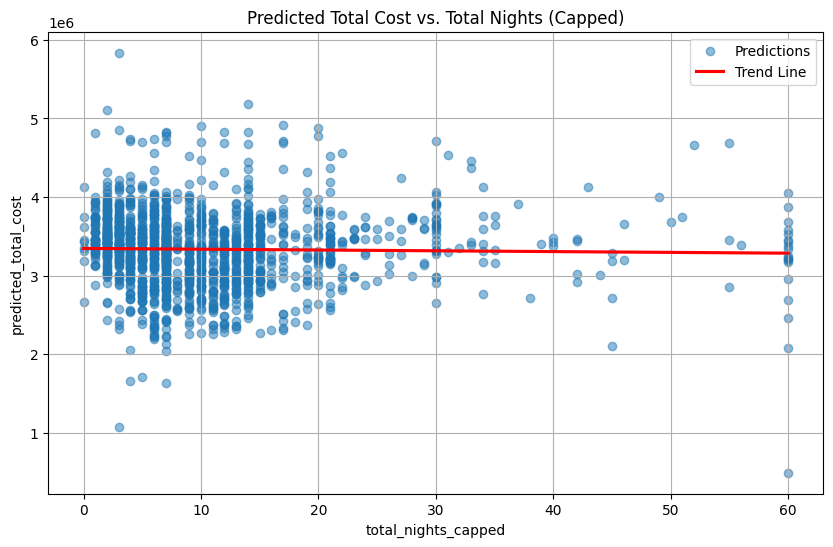

In [55]:
# Add predictions to test_data for analysis
test_data['predicted_total_cost'] = test_predictions

# Cap total_nights at the 99th percentile
cap_value = test_data['total_nights'].quantile(0.99)
test_data['total_nights_capped'] = np.where(
    test_data['total_nights'] > cap_value, cap_value, test_data['total_nights']
)

# Plot predictions vs capped total nights
plt.figure(figsize=(10, 6))
plt.scatter(test_data['total_nights_capped'], test_data['predicted_total_cost'], alpha=0.5, label="Predictions")
plt.title("Predicted Total Cost vs. Total Nights (Capped)")
plt.xlabel("Total Nights (Capped)")
plt.ylabel("Predicted Total Cost")

# Add a smoother trend line
import seaborn as sns
sns.regplot(x="total_nights_capped", y="predicted_total_cost", data=test_data, scatter=False, color="red", ci=None, label="Trend Line")
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


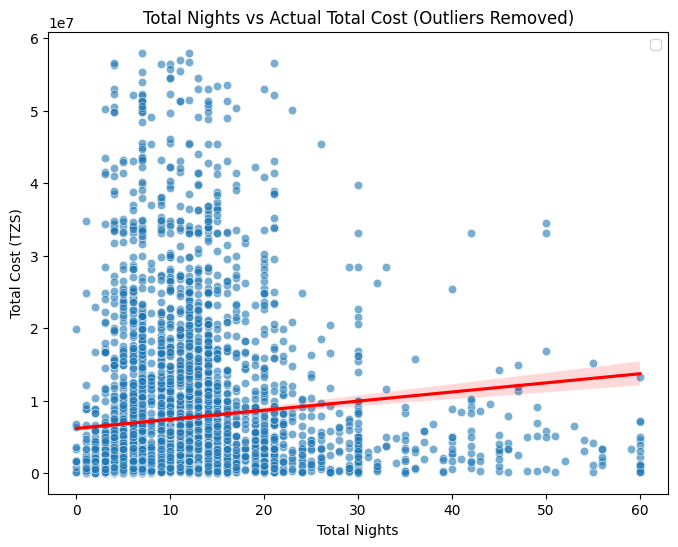

In [56]:
# Plot 1: Total Nights vs Actual Total Cost
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x=train_data['total_nights'], y=train_data['total_cost'], alpha=0.6)
# sns.regplot(x=train_data['total_nights'], y=train_data['total_cost'], scatter=False, color='red', line_kws={'label': "Trend Line"})
# plt.title("Total Nights vs Actual Total Cost")
# plt.xlabel("Total Nights")
# plt.ylabel("Total Cost (TZS)")
# plt.legend()
# plt.show()

# Define thresholds for outlier removal (e.g., 99th percentile)
cost_threshold = train_data['total_cost'].quantile(0.99)
nights_threshold = train_data['total_nights'].quantile(0.99)

# Filter the data to remove outliers
train_data_cleaned = train_data[
    (train_data['total_cost'] <= cost_threshold) &
    (train_data['total_nights'] <= nights_threshold)
]

# Plot 1: Total Nights vs Actual Total Cost (Outliers Removed)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train_data_cleaned['total_nights'], y=train_data_cleaned['total_cost'], alpha=0.6)
sns.regplot(x=train_data_cleaned['total_nights'], y=train_data_cleaned['total_cost'], 
            scatter=False, color='red', line_kws={'label': "Trend Line"})
plt.title("Total Nights vs Actual Total Cost (Outliers Removed)")
plt.xlabel("Total Nights")
plt.ylabel("Total Cost (TZS)")
plt.legend()
plt.show()

### Comparison of Graphs: Total Nights vs. Predicted and Actual Total Cost

---

#### 1. **Predicted Total Cost vs. Total Nights (Capped)**
- **Observation**:
  - The predicted total cost remains fairly constant across total nights.
  - The trend line is almost flat, suggesting that the model does not predict much variation in total cost regardless of the number of nights.
  - The predicted values cluster densely around a single range of costs, showing limited sensitivity to `total_nights`.

- **Possible Explanation**:
  - The model might not have learned a strong relationship between `total_nights` and `total_cost` from the training data.
  - Capping the total cost during preprocessing may have limited the model's ability to capture extreme variations.

---

#### 2. **Actual Total Cost vs. Total Nights (Outliers Removed)**
- **Observation**:
  - There is a slight upward trend in total cost as total nights increase, indicated by the slope of the trend line.
  - The distribution shows a wider spread of actual costs, suggesting that longer stays generally lead to higher total costs, but with significant variation.
  - Removing outliers helps highlight this relationship, as extreme values would otherwise dominate the trend.

- **Possible Explanation**:
  - In real data, tourists staying for longer durations tend to spend more overall, leading to a positive correlation.
  - While the correlation is weak, it still highlights a slight dependency of total cost on the number of nights.

---

### Key Comparison:
- **Actual Cost**:
  - Shows a weak but positive correlation between total nights and total cost.
  - Outliers removed reveal a clearer trend.

- **Predicted Cost**:
  - Shows no clear relationship between total nights and total cost.
  - The flat trend line indicates the model underestimates the importance of `total_nights` for predictions.

---

### Takeaways:
- The model currently does not reflect the real-world relationship between `total_nights` and `total_cost`.
- Further improvements can be made to feature engineering (e.g., interaction terms, non-linear transformations) and model complexity to better capture this relationship.


In [57]:
# Save Baseline model then
# Assume 'model' is your trained model
save_model(model, 'models/baseline_model.pkl')


Model saved successfully to: model/baseline_model.pkl
